<a href="https://colab.research.google.com/github/PRASANNA-416/EC386-Image-processing-Project/blob/main/EC386_with_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.applications.vgg19 import VGG19
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.vgg19 import VGG19
import tensorflow as tf
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

In [41]:
train_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Train',
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='categorical', 
                                       batch_size=5)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/gdrive/MyDrive/Mini_Project/Test', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='categorical', 
                                      batch_size=5)

Found 132 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [35]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.imshow(np.uint8())

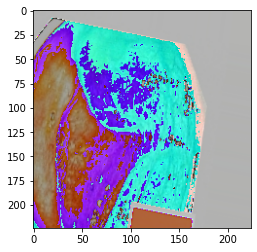

In [49]:
plt.imshow(np.uint8(train_it[1][0][0]))

In [5]:
VGG19_model = Sequential()
pretrained_model = keras.applications.VGG19(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


In [6]:
for layer in pretrained_model.layers:
        layer.trainable=False

VGG19_model.add(pretrained_model)

In [7]:
VGG19_model.add(Flatten())
VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dense(128, activation='relu'))
VGG19_model.add(Dense(3, activation='softmax'))

In [8]:
VGG19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 32,936,003
Trainable params: 12,911,619
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
VGG19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes = 3

n_steps = 10 
n_val_steps = 5
n_epochs = 30

In [11]:
history = VGG19_model.fit(train_it,
                            batch_size= 5 ,
                            epochs= 20,
                            validation_data= valid_it,
                            steps_per_epoch= 10,
                            validation_steps= 3,
                            verbose=1)

Epoch 1/20
10/10 [==============================] - 52s 5s/step - loss: 21.5189 - accuracy: 0.5200 - val_loss: 12.9401 - val_accuracy: 0.6667
Epoch 2/20
10/10 [==============================] - 22s 2s/step - loss: 11.7145 - accuracy: 0.6000 - val_loss: 12.7453 - val_accuracy: 0.7333
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 8.8181 - accuracy: 0.6000 - val_loss: 7.6898 - val_accuracy: 0.7333
Epoch 4/20
10/10 [==============================] - 6s 669ms/step - loss: 4.7085 - accuracy: 0.8298 - val_loss: 0.9218 - val_accuracy: 0.7333
Epoch 5/20
10/10 [==============================] - 6s 546ms/step - loss: 7.8650 - accuracy: 0.7000 - val_loss: 5.4598 - val_accuracy: 0.7333
Epoch 6/20
10/10 [==============================] - 5s 455ms/step - loss: 2.3392 - accuracy: 0.8723 - val_loss: 2.0164 - val_accuracy: 0.9333
Epoch 7/20
10/10 [==============================] - 3s 201ms/step - loss: 3.6992 - accuracy: 0.7447 - val_loss: 9.5658 - val_accuracy: 0.6667
Epoch 8/

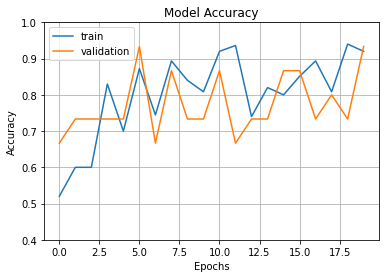

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()